In [1]:
pwd = os.getcwd()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [2]:
data_train = pd.read_csv(pwd +"\\train_u6lujuX_CVtuZ9i.csv")

In [3]:
data_train.head(5)
data_train.columns
# I think these two variable will not help full.
columns_to_drop = ['Loan_ID','CoapplicantIncome']
columns_to_drop

['Loan_ID', 'CoapplicantIncome']

In [4]:
data_train = data_train.drop(columns = columns_to_drop)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   ApplicantIncome   614 non-null    int64  
 6   LoanAmount        592 non-null    float64
 7   Loan_Amount_Term  600 non-null    float64
 8   Credit_History    564 non-null    float64
 9   Property_Area     614 non-null    object 
 10  Loan_Status       614 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 52.9+ KB


In [5]:
data_test = pd.read_csv(pwd +"\\test_Y3wMUE5_7gLdaTN.csv")
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data_test = data_test.drop(columns = columns_to_drop)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            356 non-null    object 
 1   Married           367 non-null    object 
 2   Dependents        357 non-null    object 
 3   Education         367 non-null    object 
 4   Self_Employed     344 non-null    object 
 5   ApplicantIncome   367 non-null    int64  
 6   LoanAmount        362 non-null    float64
 7   Loan_Amount_Term  361 non-null    float64
 8   Credit_History    338 non-null    float64
 9   Property_Area     367 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 28.8+ KB


In [7]:
data_train.columns
na_data = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History','Loan_Amount_Term']
na_data2 = ['LoanAmount']

In [8]:
for i in na_data:
    data_train[i].fillna(data_train[i].mode()[0], inplace=True)

for j in na_data2:
    data_train[j].fillna(data_train[j].median(), inplace=True)

#data_train['Gender'].fillna(#data_train['Gender'].mode()[0], inplace=True)
#data_train['Married'].fillna(#data_train['Married'].mode()[0], inplace=True)
#data_train['Dependents'].fillna(#data_train['Dependents'].mode()[0], inplace=True)
#data_train['Self_Employed'].fillna(#data_train['Self_Employed'].mode()[0], inplace=True)
#data_train['LoanAmount'].fillna(#data_train['LoanAmount'].median(), inplace=True)
#data_train['Loan_Amount_Term'].fillna(#data_train['Loan_Amount_Term'].mode()[0], inplace=True)
#data_train['Credit_History'].fillna(#data_train['Credit_History'].mode()[0], inplace=True)

In [9]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


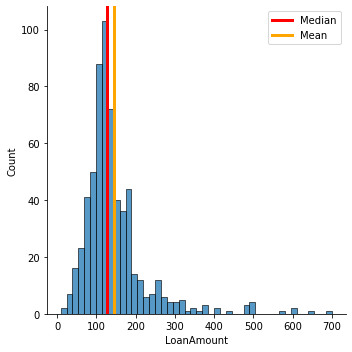

In [10]:
#data_train.to_csv('data_trainmodi.csv')
sns.displot(data_train['LoanAmount'])
plt.axvline(x=data_train['LoanAmount'].median(),
            color='red',linewidth=3, label='Median')
plt.axvline(x=data_train['LoanAmount'].mean(),
            color='orange',linewidth=3, label='Mean')
plt.legend()

In [11]:
for i in na_data:
    data_test[i].fillna(data_test[i].mode()[0], inplace=True)

for j in na_data2:
    data_test[j].fillna(data_test[j].median(), inplace=True)

In [12]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,187.0,360.0,1.0,Urban,Y


In [13]:
dummies = pd.get_dummies(data_train[['Gender','Married','Education','Self_Employed','Property_Area','Dependents']])
dummies
data_train = pd.concat([dummies,data_train.drop(['Gender','Married','Education','Self_Employed','Property_Area','Dependents'],axis=1)],axis=1)
data_train

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,5849,128.0,360.0,1.0,Y
1,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,4583,128.0,360.0,1.0,N
2,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,3000,66.0,360.0,1.0,Y
3,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,2583,120.0,360.0,1.0,Y
4,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,6000,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,2900,71.0,360.0,1.0,Y
610,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,4106,40.0,180.0,1.0,Y
611,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,8072,253.0,360.0,1.0,Y
612,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,7583,187.0,360.0,1.0,Y


In [14]:
lable_encoder = LabelEncoder()
data_train['Loan_Status'] = lable_encoder.fit_transform(data_train['Loan_Status'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            614 non-null    uint8  
 1   Gender_Male              614 non-null    uint8  
 2   Married_No               614 non-null    uint8  
 3   Married_Yes              614 non-null    uint8  
 4   Education_Graduate       614 non-null    uint8  
 5   Education_Not Graduate   614 non-null    uint8  
 6   Self_Employed_No         614 non-null    uint8  
 7   Self_Employed_Yes        614 non-null    uint8  
 8   Property_Area_Rural      614 non-null    uint8  
 9   Property_Area_Semiurban  614 non-null    uint8  
 10  Property_Area_Urban      614 non-null    uint8  
 11  Dependents_0             614 non-null    uint8  
 12  Dependents_1             614 non-null    uint8  
 13  Dependents_2             614 non-null    uint8  
 14  Dependents_3+            6

In [15]:
# Most correlated values are: 1) Credit_History 2) Property_Area_Semiurban 3) Property_Area_Rural 4) Property_Area_Urban
corr_train = data_train.corr()
corr_train['Loan_Status'].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_Yes                0.091478
Education_Graduate         0.085884
Dependents_2               0.062384
Gender_Male                0.017987
Self_Employed_No           0.003700
Dependents_0              -0.003044
Self_Employed_Yes         -0.003700
ApplicantIncome           -0.004710
Gender_Female             -0.017987
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
Education_Not Graduate    -0.085884
Married_No                -0.091478
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64

In [16]:
data_train['ApplicantIncome'].describe()
#data_train['income_cat'] = pd.cut(data_train['ApplicantIncome'],bins=[149.0,2870.5,3812.5,5795.0,81000.0],labels=[1,2,3,4])

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [17]:
data_train['income_cat'] = pd.cut(data_train['ApplicantIncome'],bins=[149.0,2870.5,3812.5,5795.0,81000.0],labels=[1,2,3,4])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender_Female            614 non-null    uint8   
 1   Gender_Male              614 non-null    uint8   
 2   Married_No               614 non-null    uint8   
 3   Married_Yes              614 non-null    uint8   
 4   Education_Graduate       614 non-null    uint8   
 5   Education_Not Graduate   614 non-null    uint8   
 6   Self_Employed_No         614 non-null    uint8   
 7   Self_Employed_Yes        614 non-null    uint8   
 8   Property_Area_Rural      614 non-null    uint8   
 9   Property_Area_Semiurban  614 non-null    uint8   
 10  Property_Area_Urban      614 non-null    uint8   
 11  Dependents_0             614 non-null    uint8   
 12  Dependents_1             614 non-null    uint8   
 13  Dependents_2             614 non-null    uint8   
 14  Dependents

In [18]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(data_train, data_train['income_cat']):
    strat_train = data_train.loc[train_index]
    strat_train_test = data_train.loc[test_index]
data_train = strat_train
data_train_test = strat_train_test

In [19]:
data_train = data_train.drop(['income_cat'],axis=1)
data_train_test = data_train_test.drop(['income_cat'], axis=1)

In [20]:
data_train_X, data_train_y, data_train_test_X, data_train_test_y = \
data_train.drop(['Loan_Status'],axis=1), data_train['Loan_Status'], data_train_test.drop(['Loan_Status'],axis=1),\
data_train_test['Loan_Status']

data_train_X

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
545,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,2768,155.0,360.0,1.0
424,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,14880,96.0,360.0,1.0
213,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,5703,130.0,360.0,1.0
162,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,3089,121.0,360.0,0.0
256,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,6045,115.0,360.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,1958,131.0,360.0,1.0
135,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,4000,290.0,360.0,1.0
237,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,3463,122.0,360.0,1.0
84,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,3988,50.0,240.0,1.0


In [21]:
scaler = StandardScaler()
data_train_X, data_train_test_X = scaler.fit_transform(data_train_X),\
scaler.fit_transform(data_train_test_X)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(data_train_X, data_train_y)

LogisticRegression()

In [23]:
bag_log_clf = BaggingClassifier(\
                               log_reg, n_estimators=500,
                               max_samples=100,bootstrap=True,n_jobs=-1,
                               oob_score=True)
bag_log_clf.fit(data_train_X, data_train_y)

BaggingClassifier(base_estimator=LogisticRegression(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [25]:
y_train_predict = cross_val_predict(bag_log_clf, data_train_X, data_train_y, cv= 3)
'Log Classifier Bag - Train score: {}'.format(f1_score(data_train_y, y_train_predict))

'Log Classifier Bag - Train score: 0.865533230293663'

In [26]:
y_train_test_predict = bag_log_clf.predict(data_train_test_X)
'Log Classifier Bag - Test score: {}'.format(f1_score(y_train_test_predict, data_train_test_y))

'Log Classifier Bag - Test score: 0.8881118881118881'

In [27]:
# This function shows the evolution of the training and testing performance
def show_evo_train_test(model, data_train_X, data_train_y, data_test_X, data_test_y):
    train_errors, test_errors = [], []
    label_encoder = LabelEncoder()
    for i in range(5,len(data_train_X)):
        if data_train_y[:i].nunique() > 1:
            model.fit(data_train_X[:i], data_train_y[:i])
            y_train_pred = model.predict(data_train_X[:i])
            y_test_pred = model.predict(data_test_X)
            train_errors.append(f1_score(y_train_pred, data_train_y[:i]))
            test_errors.append(f1_score(y_test_pred, data_test_y))
            #if abs(train_errors[-1]-test_errors[-1]) < 0.005:
            #    print(i)
    plt.plot(np.sqrt(train_errors),'r-', linewidth=2,label='train')
    plt.plot(np.sqrt(test_errors),'b-', linewidth=2,label='test')
    plt.legend()

In [28]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(data_train_X, data_train_y)

DecisionTreeClassifier(max_depth=3)

In [29]:
# We try using a bagging classifier
bag_dt_clf = BaggingClassifier(\
                               dt_clf, n_estimators=500,
                               max_samples=100,bootstrap=True,n_jobs=-1,
                               oob_score=True)
bag_dt_clf.fit(data_train_X, data_train_y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True)

In [30]:
y_train_predict2 = cross_val_predict(bag_dt_clf, data_train_X, data_train_y, cv= 3)
'Decision Tree Bag - Train score: {}'.format(f1_score(y_train_predict2, data_train_y))

'Decision Tree Bag - Train score: 0.8689024390243902'

In [31]:
y_train_test_predict2 = bag_dt_clf.predict(data_train_test_X)
'Decision Tree Bag - Test score: {}'.format(f1_score(y_train_test_predict2, data_train_test_y))

'Decision Tree Bag - Test score: 0.896551724137931'